# Sigmoid Perceptron from Scratch
Esta jupyter notebook implementa un modelo de perceptrón con función de activación sigmoide para la clasificación binaria desde cero (sin usar las funciones que existen en algunas librerías).

Nota: Cuando digo salida directa, me refiero a una salida visible en el notebook.

## 1. Instalación e Importación de librerías

Este bloque de código instala e importa las bibliotecas necesarias para la obtención, manipulación, procesamiento, entrenamiento y visualización de datos, que serán utilizadas en la implementación del modelo de perceptrón sigmoide para la clasificación binaria. Las bibliotecas incluyen herramientas para manejar datos, crear gráficos, realizar cálculos numéricos, y usar redes neuronales con TensorFlow.

**Salida**: No hay salida directa, solo se importan las librerías necesarias para el resto del notebook.

In [2]:
# Instalamos la librería 'ucimlrepo' para acceder al repositorio de datasets de UCI
%pip install ucimlrepo  

# Importamos la función 'fetch_ucirepo' para descargar datasets de UCI
from ucimlrepo import fetch_ucirepo  
# Importamos pandas para manejar datos en forma de DataFrames
import pandas as pd  
# Importamos matplotlib para visualizar los datos mediante gráficos
import matplotlib.pyplot as plt  
# Importamos numpy para realizar cálculos matemáticos y manejar arrays
import numpy as np  
# Importamos TensorFlow para crear y entrenar modelos de redes neuronales
import tensorflow as tf  
# Importamos 'train_test_split' para dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split  
# Importamos 'StandardScaler' para normalizar los datos y escalar las características
from sklearn.preprocessing import StandardScaler  

Note: you may need to restart the kernel to use updated packages.


## 2. Descarga y Preparación de los Datos

En este bloque se descarga el dataset "`Occupancy Detection`" desde el repositorio UCI utilizando su ID, y se almacena en una variable. A continuación, se extraen los datos originales para ser procesados en las siguientes etapas del modelo de perceptrón sigmoide.

**Salida**: No hay salida directa. El dataset "Occupancy Detection" se descarga y se almacena en la variable data para su posterior procesamiento.

In [3]:
# Download `occupancy-detection` dataset
# using the id=357
# Descargar el dataset 'Occupancy Detection' usando su identificador en el repositorio UCI (ID=357)
occupancy_detection = fetch_ucirepo(id=357) 

# Build the feature and the target data sets
# Extraer los datos originales del dataset descargado y almacenarlos en la variable 'data'
data = occupancy_detection.data.original 

## 3. Limpieza y Transformación de Datos
Este bloque elimina las columnas innecesarias del dataset, como las columnas de `date` e `id`, que no aportan valor al modelo. Posteriormente, se asegura de que todas las columnas contengan datos numéricos y elimina las filas que tengan valores faltantes o incorrectos.

**Salida**: No hay salida directa. Se realiza la limpieza de datos, eliminando las columnas irrelevantes (`date` e `id`), convirtiendo los valores a tipo numérico, y eliminando filas con valores faltantes (NaN), preparando los datos para su uso en el modelo.

In [4]:
# Eliminamos las columnas 'date' e 'id' ya que no son útiles para el modelo
df = data.drop(['date', 'id'], axis=1)

# Convertimos todos los valores de las columnas a tipo numérico, forzando a NaN aquellos que no se puedan convertir
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')

# Eliminamos las filas que contengan valores NaN generados por la conversión o por datos faltantes
df = df.dropna()

## 4. Visualización del DataFrame
Este bloque simplemente visualiza el contenido del DataFrame `df` después de la limpieza y transformación de los datos. Nos permite observar la estructura y las características del dataset, asegurándonos de que todo esté correctamente formateado antes de proceder con el análisis.

**Salida**: Muestra el contenido del DataFrame `df` después de la limpieza, incluyendo las características y la variable objetivo (`Occupancy`). Se puede observar la estructura del dataset con las filas y columnas resultantes tras el preprocesamiento.

In [5]:
# Mostramos el contenido del DataFrame 'df' para verificar su estructura después de la limpieza
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.180,27.2720,426.00,721.25,0.004793,1.0
1,23.150,27.2675,429.50,714.00,0.004783,1.0
2,23.150,27.2450,426.00,713.50,0.004779,1.0
3,23.150,27.2000,426.00,708.25,0.004772,1.0
4,23.100,27.2000,426.00,704.50,0.004757,1.0
...,...,...,...,...,...,...
20557,20.815,27.7175,429.75,1505.25,0.004213,1.0
20558,20.865,27.7450,423.50,1514.50,0.004230,1.0
20559,20.890,27.7450,423.50,1521.50,0.004237,1.0
20560,20.890,28.0225,418.75,1632.00,0.004279,1.0


## 5. Descripción Estadística de los Datos
Este bloque genera un resumen estadístico de las características numéricas del DataFrame. Muestra información como el promedio, la desviación estándar, los valores mínimo y máximo, así como los percentiles, lo que ayuda a entender mejor la distribución de los datos.

**Salida**: Se genera un resumen estadístico del DataFrame `df`, que incluye métricas como la media, desviación estándar, valores mínimos, máximos y percentiles (25%, 50%, 75%) de cada característica del conjunto de datos.

In [6]:
# Generamos un resumen estadístico del DataFrame, incluyendo métricas como media, desviación estándar, y percentiles
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


## 6. Establecimiento de la Semilla Aleatoria
Este bloque de código establece una semilla aleatoria para TensorFlow, lo cual asegura que los resultados del modelo sean reproducibles. Es útil cuando se trabaja con redes neuronales para que los valores iniciales generados aleatoriamente sean los mismos en cada ejecución del código.

**Salida**: No hay salida directa. Se establece una semilla aleatoria para garantizar la reproducibilidad de los resultados en TensorFlow, asegurando que los valores aleatorios generados en el modelo sean los mismos en cada ejecución.

In [7]:
# Establecemos una semilla aleatoria para garantizar la reproducibilidad de los resultados en TensorFlow
tf.random.set_seed(4500)

## 7. Separación de Características y Variable Objetivo
En este bloque, se separan las características (X) y la variable objetivo (y) del DataFrame. La columna `Occupancy` se establece como la variable objetivo (y), mientras que el resto de las columnas se usan como características (X) para entrenar el modelo.

**Salida**: No hay salida directa. Se separan las características (almacenadas en `X`) y la variable objetivo (`y`) del DataFrame. Las características se utilizan para entrenar el modelo, mientras que la variable objetivo contiene las etiquetas de clasificación.

In [8]:
# Separar las características (variables independientes) eliminando la columna 'Occupancy' que es la variable objetivo
X = df.drop(["Occupancy"], axis=1)

# Asignar la columna 'Occupancy' como la variable objetivo
y = df['Occupancy']

## 8. División del Conjunto de Datos en Entrenamiento y Prueba
Este bloque divide el dataset en dos partes: un conjunto de entrenamiento y un conjunto de prueba. Se asigna el 80% de los datos para el entrenamiento del modelo y el 20% para su evaluación. La opción `shuffle=True` asegura que los datos se mezclen antes de dividirse para evitar sesgos, y se establece una semilla de aleatorización (`random_state=42`) para garantizar la reproducibilidad.

**Salida**: No hay salida directa. El conjunto de datos se divide en conjuntos de entrenamiento (`X_train`, `y_train`) y de prueba (`X_test`, `y_test`), asignando el 80% de los datos para entrenamiento y el 20% para evaluación, con los datos mezclados de manera aleatoria.

In [9]:
# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## 9. Normalización de las Características
Este bloque aplica la normalización a las características (X) utilizando `StandardScaler`. Este proceso ajusta las características para que tengan una media de 0 y una desviación estándar de 1, lo cual mejora el rendimiento del modelo al asegurar que todas las características estén en la misma escala.

**Salida**: No hay salida directa. Las características de los conjuntos de entrenamiento y prueba se estandarizan utilizando `StandardScaler`, ajustando las características para que tengan una media de 0 y una desviación estándar de 1. Esto asegura que todas las características estén en la misma escala.

In [10]:
# Inicializamos el objeto 'StandardScaler' para estandarizar las características
scaler = StandardScaler()

# Ajustamos y transformamos el conjunto de entrenamiento, estandarizando las características
X_train = scaler.fit_transform(X_train)

# Transformamos el conjunto de prueba utilizando los mismos parámetros obtenidos del conjunto de entrenamiento
X_test = scaler.transform(X_test)

## 10. Implementación del Modelo de Neurona (Perceptrón Sigmoide)
En este bloque se define una clase `NeuronModel` que implementa un perceptrón sigmoide para la clasificación binaria. La clase incluye los métodos para inicializar el modelo, realizar la propagación hacia adelante y atrás, actualizar los parámetros, y entrenar el modelo. También se incluyen métodos para evaluar el modelo, predecir resultados y visualizar la función de costo

**Salida**: No hay salida directa. Se define la clase `NeuronModel`, que implementa un perceptrón sigmoide desde cero, incluyendo funciones para la propagación hacia adelante, la propagación hacia atrás, el cálculo de la función de costo, la actualización de los parámetros, la predicción y la evaluación del modelo. Esta clase se utilizará para entrenar y evaluar el modelo.

In [11]:
# Importamos la función expit, que es la versión de scipy de la función sigmoide
from scipy.special import expit  

# Se define una clase NeuronModel para implementar el perceptrón sigmoide
class NeuronModel():  

    # Método para inicializar las instancias del modelo
    def __init__(self, X, y, learning_rate=0.01, error_threshold=0.001) -> None:  
        assert X.size != 0, "X cannot be empty"  # Verificamos que X no esté vacío
        assert y.size != 0, "y cannot be empty"  # Verificamos que y no esté vacío
        assert learning_rate > 0, "learning rate must be positive"  # Verificamos que la tasa de aprendizaje sea positiva

        if not isinstance(X, np.ndarray):  # Convertimos X a un array de numpy si no lo es
            X = X.to_numpy()
        
        if not isinstance(y, np.ndarray):  # Convertimos y a un array de numpy si no lo es
            y = y.to_numpy().reshape(-1,1)

        self.X = X  # Asignamos X a la instancia
        self.y = y  # Asignamos y a la instancia
        self.learning_rate = learning_rate  # Asignamos la tasa de aprendizaje
        self.w = np.zeros((X.shape[1], 1))  # Inicializamos los pesos con ceros
        self.b = np.zeros((1, 1))  # Inicializamos el bias con cero
        self.N = X.shape[0]  # Guardamos el número de ejemplos en el conjunto de datos
        self.J_iter = list()  # Inicializamos una lista para almacenar los valores de la función de costo
        self.stopping_tolerance = error_threshold  # Establecemos la tolerancia de parada para el entrenamiento

    # Función para calcular la salida logística usando la función sigmoide
    def compute_logistic(self, w, b, X):  
        return expit(X @ w + b)  # Calculamos la combinación lineal de los inputs y aplicamos la función sigmoide

    # Función para calcular la función de costo utilizando entropía cruzada
    def compute_cost(self, y_hat, y, N):  
        L = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)  # Calculamos la entropía cruzada entre las predicciones y los valores reales
        J = -L.sum() / N  # Promediamos la entropía cruzada sobre todos los ejemplos
        return J  # Devolvemos el costo

    # Función para realizar la propagación hacia adelante
    def forward_propagation(self, w, b, X):  
        a = self.compute_logistic(w, b, X)  # Calculamos la salida usando la función sigmoide
        return a  # Devolvemos la salida

    # Función para calcular los gradientes (propagación hacia atrás)
    def backward_propagation(self, y_hat, y, w, X):  
        N = X.shape[0]  # Número de ejemplos
        gradient_w = np.multiply(y_hat - y, X).sum(axis=0) / N  # Calculamos el gradiente respecto a los pesos
        gradient_w = gradient_w.reshape(w.shape)  # Ajustamos la forma del gradiente para coincidir con los pesos
        gradient_b = (y_hat - y).sum() / N  # Calculamos el gradiente respecto al bias
        gradient_b = gradient_b.reshape(-1, 1)  # Ajustamos la forma del gradiente del bias
        return gradient_w, gradient_b  # Devolvemos los gradientes para los pesos y el bias

    # Función para actualizar los parámetros del modelo
    def update_parameters(self, param, gradient):  
        return np.subtract(param, np.multiply(self.learning_rate, gradient))  # Actualizamos los parámetros restando el gradiente multiplicado por la tasa de aprendizaje

    # Función para entrenar el modelo
    def train(self, verbose=0):  

        y_hat = self.forward_propagation(self.w, self.b, self.X)  # Calculamos las predicciones iniciales
        J_prev = self.compute_cost(y_hat, self.y, self.N)  # Calculamos el costo inicial
        J, current_percentage_error = 0, 100  # Inicializamos el costo y el error porcentual
        w, b = self.w, self.b  # Inicializamos los pesos y el bias

        while current_percentage_error > self.stopping_tolerance:  # Iteramos hasta que el error sea menor que la tolerancia
            J_prev = J  # Guardamos el costo anterior

            y_hat = self.forward_propagation(w, b, self.X)  # Calculamos las nuevas predicciones

            gradient_w, gradient_b = self.backward_propagation(y_hat, self.y, w, self.X)  # Calculamos los gradientes

            w = self.update_parameters(w, gradient_w)  # Actualizamos los pesos
            b = self.update_parameters(b, gradient_b)  # Actualizamos el bias

            y_hat = self.forward_propagation(w, b, self.X)  # Calculamos las predicciones actualizadas
            J = self.compute_cost(y_hat, self.y, self.N)  # Calculamos el nuevo costo
            self.J_iter.append(J)  # Almacenamos el costo para su posterior visualización

            current_percentage_error = np.abs((J - J_prev) / J) * 100  # Calculamos el error porcentual entre el costo anterior y el actual

            if verbose:  # Si verbose está activado, imprimimos los detalles del costo en cada iteración
                print(f"J_previous: {J_prev:8.6f} \t"
                        f"J_current: {J:8.6f} \t"
                        f"Error: {current_percentage_error:8.6f}")

        self.w = w  # Guardamos los pesos finales
        self.b = b  # Guardamos el bias final

    # Función para realizar predicciones con el modelo entrenado
    def predict(self, X):  
        a = self.forward_propagation(self.w, self.b, X)  # Calculamos las predicciones usando la propagación hacia adelante
        return a  # Devolvemos las predicciones

    # Función para graficar la evolución del costo durante el entrenamiento
    def plot_cost_function(self):  
        plt.plot(self.J_iter)  # Graficamos los valores de la función de costo almacenados
        plt.xlabel('Iteration')  # Etiqueta para el eje x
        plt.ylabel(r"$J_{\mathbf{w}}$")  # Etiqueta para el eje y

    # Función para evaluar el modelo
    def evaluate(self, y_hat, y):  

        if not isinstance(y, np.ndarray):  # Aseguramos que y esté en formato de array de numpy
            y = y.to_numpy().reshape(-1, 1)

        y_hat[y_hat >= 0.5] = 1  # Convertimos las predicciones en 1 si son mayores o iguales a 0.5
        y_hat[y_hat < 0.5] = 0  # Convertimos las predicciones en 0 si son menores a 0.5

        err = np.where((np.abs(y - y_hat) > 0) == True)[0]  # Calculamos los errores como las diferencias entre y_hat e y

        return 1 - err.shape[0] / y.shape[0]  # Devolvemos la exactitud del modelo

    # Función para obtener los parámetros del modelo (pesos y bias)
    def get_parameters(self):  
        return np.vstack((self.w, self.b))  # Concatenamos los pesos y el bias en una sola matriz y los devolvemos

## 11. Creación y Entrenamiento del Modelo
En este bloque se crea una instancia del modelo de perceptrón sigmoide, proporcionando el conjunto de entrenamiento, la tasa de aprendizaje y el umbral de error para detener el entrenamiento. Posteriormente, el modelo es entrenado, con `verbose=1` activado para mostrar el progreso del entrenamiento en cada iteración.

**Salida**: Durante el entrenamiento, se imprimen detalles en cada iteración que incluyen el costo anterior, el costo actual, y el error porcentual de cambio. El modelo ajusta los pesos y el bias en cada iteración hasta que el error porcentual es menor que el umbral de error especificado (0.01). La salida muestra la progresión del costo a lo largo de las iteraciones.

In [12]:
# Creamos una instancia de NeuronModel, pasando las características y etiquetas de entrenamiento, una tasa de aprendizaje de 1 y un umbral de error de 0.01
model = NeuronModel(X=X_train, y=y_train, learning_rate=1, error_threshold=0.01)

# Entrenamos el modelo con el conjunto de entrenamiento y activamos verbose=1 para imprimir detalles en cada iteración
model.train(verbose=1)

J_previous: 0.000000 	J_current: 0.434288 	Error: 100.000000
J_previous: 0.434288 	J_current: 0.337854 	Error: 28.542931
J_previous: 0.337854 	J_current: 0.284542 	Error: 18.736343
J_previous: 0.284542 	J_current: 0.249663 	Error: 13.970439
J_previous: 0.249663 	J_current: 0.224651 	Error: 11.133710
J_previous: 0.224651 	J_current: 0.205647 	Error: 9.240989
J_previous: 0.205647 	J_current: 0.190621 	Error: 7.882361
J_previous: 0.190621 	J_current: 0.178390 	Error: 6.856745
J_previous: 0.178390 	J_current: 0.168207 	Error: 6.053642
J_previous: 0.168207 	J_current: 0.159579 	Error: 5.407044
J_previous: 0.159579 	J_current: 0.152161 	Error: 4.874943
J_previous: 0.152161 	J_current: 0.145707 	Error: 4.429250
J_previous: 0.145707 	J_current: 0.140035 	Error: 4.050434
J_previous: 0.140035 	J_current: 0.135007 	Error: 3.724473
J_previous: 0.135007 	J_current: 0.130516 	Error: 3.441032
J_previous: 0.130516 	J_current: 0.126478 	Error: 3.192321
J_previous: 0.126478 	J_current: 0.122827 	Error: 

## 12. Visualización de la Función de Costo
Este bloque grafica la función de costo a lo largo de las iteraciones del entrenamiento. Nos permite observar cómo el costo disminuye con el tiempo, lo cual es un indicador de que el modelo está aprendiendo y ajustando sus parámetros correctamente.

**Salida**: Se genera un gráfico que muestra la evolución de la función de costo a lo largo de las iteraciones del entrenamiento. El eje x representa las iteraciones, y el eje y muestra el valor del costo. Este gráfico permite visualizar cómo el costo disminuye a medida que el modelo se entrena, indicando que el modelo está aprendiendo.

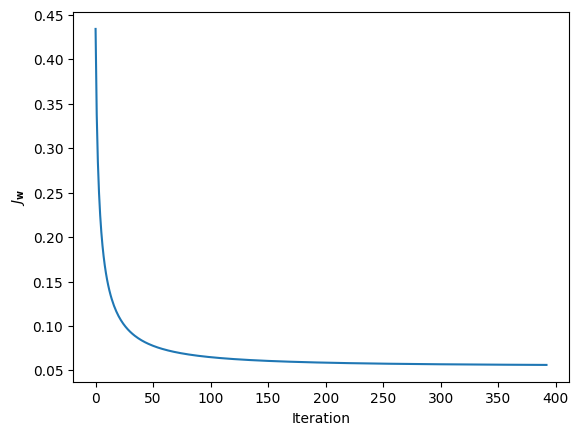

In [13]:
# Graficamos la evolución de la función de costo durante las iteraciones del entrenamiento
model.plot_cost_function()

## 13. Realización de Predicciones
En este bloque se utilizan los pesos y bias del modelo entrenado para realizar predicciones sobre el conjunto de prueba (`X_test`). El modelo aplica la propagación hacia adelante para generar las predicciones.

**Salida**: No hay salida directa. El modelo entrenado realiza predicciones en el conjunto de prueba (`X_test`), devolviendo las etiquetas predichas almacenadas en `y_predictions`, que se utilizarán para evaluar el rendimiento del modelo en el conjunto de prueba.

In [14]:
# Usamos el modelo entrenado para predecir las etiquetas del conjunto de prueba
y_predictions = model.predict(X=X_test)

## 14. Obtención de los Parámetros del Modelo
Este bloque devuelve los parámetros del modelo, es decir, los pesos y el bias, que fueron aprendidos durante el proceso de entrenamiento. Estos parámetros determinan cómo el modelo toma decisiones y realiza las predicciones.

**Salida**: Se muestra una matriz que contiene los parámetros aprendidos por el modelo durante el entrenamiento. Esta matriz incluye los pesos asociados a cada característica y el valor del bias. Estos valores representan el ajuste final del modelo para realizar las predicciones.

In [15]:
# Obtenemos los parámetros (pesos y bias) aprendidos por el modelo durante el entrenamiento
model.get_parameters()

array([[-0.72815137],
       [ 0.20614421],
       [ 4.29723527],
       [ 0.95814606],
       [ 0.17301175],
       [-3.70904074]])

## 15. Evaluación del Modelo
Este bloque evalúa el rendimiento del modelo utilizando las predicciones generadas (`y_predictions`) y las etiquetas reales del conjunto de prueba (`y_test`). La función devuelve la exactitud del modelo, que indica qué tan bien predice el modelo en comparación con los valores reales.

**Salida**: Se devuelve y muestra la precisión del modelo. Esta métrica indica el porcentaje de predicciones correctas hechas por el modelo en el conjunto de prueba, comparando las predicciones (`y_predictions`) con las etiquetas reales (`y_test`). Una precisión alta indica un buen rendimiento del modelo. 

In [16]:
# Evaluamos la precisión del modelo comparando las predicciones (y_predictions) con las etiquetas reales (y_test)
model.evaluate(y_hat=y_predictions, y=y_test)

0.9892996108949417

## 16. Cálculo de Métricas de Rendimiento del Clasificador Perceptrón
En este bloque se calcula la precisión, precisión (precision), recall, especificidad y F1-score para evaluar el rendimiento del clasificador perceptrón en el conjunto de prueba. Estas métricas permiten un análisis más profundo de la capacidad del modelo para clasificar correctamente las instancias positivas y negativas, evaluando también su capacidad para evitar falsos positivos y falsos negativos.

**Salida**: Se imprimen varias métricas de rendimiento basadas en la matriz de confusión:
- **Accuracy (Precisión global)**: Mide la proporción de predicciones correctas sobre el total de predicciones.
- **Precision (Precisión)**: Mide cuántas de las predicciones positivas realizadas por el modelo fueron correctas.
- **Recall (Sensibilidad)**: Mide cuántas de las instancias positivas reales fueron correctamente identificadas por el modelo.
- **Specificity (Especificidad)**: Mide cuántas de las instancias negativas reales fueron correctamente identificadas.
- **F1-score**: Es la media armónica entre la precisión y el recall, proporcionando una métrica equilibrada entre ambas.
<br><br>
Estas métricas permiten una evaluación completa del rendimiento del modelo.

In [17]:
# Importamos la función confusion_matrix de sklearn para calcular la matriz de confusión
from sklearn.metrics import confusion_matrix

# Hacemos predicciones en el conjunto de prueba usando el modelo entrenado
# Convertimos las predicciones en valores binarios, clasificando como 1 si el valor es mayor a 0.5
y_predictions = model.predict(X_test) > 0.5  

# Calculamos la matriz de confusión comparando las etiquetas reales y las predicciones del modelo
c_matrix = confusion_matrix(y_true=y_test, y_pred=y_predictions)

# Definimos una función para calcular varias métricas de rendimiento a partir de la matriz de confusión
def get_performance_metrics(c_matrix):
    # Extraemos los valores de la matriz de confusión: verdaderos negativos (tn), falsos positivos (fp),
    # falsos negativos (fn), y verdaderos positivos (tp)
    tn, fp, fn, tp = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1]
    
    # Calculamos la precisión global (accuracy), que mide la proporción de predicciones correctas
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Calculamos la precisión (precision), que mide la proporción de predicciones positivas correctas
    precision = tp / (tp + fp)
    
    # Calculamos el recall (sensibilidad), que mide la proporción de verdaderos positivos detectados
    recall = tp / (tp + fn)
    
    # Calculamos la especificidad, que mide la proporción de verdaderos negativos correctamente clasificados
    specificity = tn / (tn + fp)
    
    # Calculamos el F1-score, que es la media armónica entre precisión y recall
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    # Devolvemos todas las métricas calculadas
    return accuracy, precision, recall, specificity, f1_score

# Llamamos a la función para calcular las métricas de rendimiento utilizando la matriz de confusión
accuracy, precision, recall, specificity, f1_score = get_performance_metrics(c_matrix)

# Imprimimos la precisión global con 6 decimales
print(f"Accuracy: {accuracy:0.6f}")
# Imprimimos la precisión con 6 decimales
print(f"Precision: {precision:0.6f}")
# Imprimimos el recall con 6 decimales
print(f"Recall: {recall:0.6f}")
# Imprimimos la especificidad con 6 decimales
print(f"Specificity: {specificity:0.6f}")
# Imprimimos el F1-score con 6 decimales
print(f"F1-score: {f1_score:0.6f}")

Accuracy: 0.989300
Precision: 0.957645
Recall: 0.996774
Specificity: 0.987115
F1-score: 0.976818


### Explicación de las Métricas de Rendimiento: Accuracy, Precision, Recall, Specificity y F1-score
- **Accuracy (Precisión global)**: La precisión mide la proporción de predicciones correctas en el conjunto de prueba. Si bien es una métrica útil, puede ser engañosa en conjuntos de datos desbalanceados, ya que un modelo podría obtener una alta precisión simplemente prediciendo la clase mayoritaria. En este caso, una precisión alta indica que el modelo está clasificando correctamente la mayoría de las instancias.
- **Precision (Precisión)**: La precisión es la proporción de verdaderos positivos entre todas las predicciones positivas realizadas por el modelo. Es una métrica importante cuando el costo de tener falsos positivos es alto. Una precisión alta significa que el modelo es confiable cuando predice una clase positiva (en este caso, la ocupación).
- **Recall (Sensibilidad)**: El recall mide la proporción de verdaderos positivos correctamente identificados entre todas las instancias positivas reales. Es útil en situaciones donde es más importante minimizar los falsos negativos. Una alta sensibilidad indica que el modelo detecta la mayoría de las instancias positivas.
- **Specificity (Especificidad)**: La especificidad mide la proporción de verdaderos negativos correctamente identificados entre todas las instancias negativas reales. Esta métrica es relevante cuando es importante evitar los falsos positivos. Una alta especificidad indica que el modelo es bueno detectando las instancias negativas (habitaciones no ocupadas).
- **F1-score**: El F1-score es la media armónica entre la precisión y el recall, y es útil cuando hay un balance entre la necesidad de minimizar tanto los falsos positivos como los falsos negativos. Un F1-score alto indica que el modelo tiene un buen equilibrio entre precisión y sensibilidad, siendo particularmente útil cuando las clases están desbalanceadas. <br><br>
Estas métricas permiten una evaluación más completa del rendimiento del modelo en lugar de confiar únicamente en la precisión global, lo que puede ser engañoso en ciertos escenarios (como cuando las clases están desvalanceadas o cuando se busca tener menos falsos negativos).


### Análisis de Resultados:

1. **Accuracy (0.989300)**: El modelo tiene una precisión global muy alta, con aproximadamente un 98.93% de predicciones correctas. Esto indica que el modelo es muy eficaz en clasificar correctamente tanto las instancias positivas como negativas.

2. **Precision (0.957645)**: La precisión es del 95.76%, lo que significa que, de todas las predicciones positivas que hizo el modelo, un 95.76% fueron correctas. Esto es importante en situaciones donde los falsos positivos deben minimizarse, como en la detección de ocupación incorrecta.

3. **Recall (0.996774)**: El recall es extremadamente alto, con un valor de 99.68%. Esto indica que el modelo es muy bueno detectando las instancias positivas reales (ocupación), lo que significa que muy pocos casos positivos fueron clasificados incorrectamente como negativos (falsos negativos).

4. **Specificity (0.987115)**: La especificidad es del 98.71%, lo que indica que el modelo es también muy eficaz para identificar correctamente las instancias negativas (habitaciones no ocupadas). Este resultado sugiere que el modelo evita con éxito los falsos positivos.

5. **F1-score (0.976818)**: El F1-score, que combina la precisión y el recall, es de 97.68%, lo que indica un equilibrio sólido entre ambas métricas. El modelo mantiene un buen balance entre minimizar los falsos positivos y los falsos negativos, lo que es ideal en problemas de clasificación con una mezcla de métricas críticas.

### Conclusión:
Los resultados muestran que el modelo entrenado es altamente efectivo en la clasificación binaria de ocupación, con un equilibrio saludable entre precisión, recall y especificidad. Esto sugiere que el modelo es capaz de hacer predicciones muy precisas en general, tanto identificando correctamente los positivos (ocupación) como los negativos (no ocupación), minimizando al mismo tiempo los falsos positivos y los falsos negativos.


## Selección del Mejor Modelo
### Comparación de los Modelos A (Hecho a Mano) y B (TensorFlow)
#### Parámetros Obtenidos:

**Modelo A (Hecho a Mano)**:
Los parámetros (pesos y bias) obtenidos manualmente son los siguientes: <br>
array([[-0.72815137], [ 0.20614421], [ 4.29723527], [ 0.95814606], [ 0.17301175], [-3.70904074]])

**Modelo B (TensorFlow)**:
Los parámetros obtenidos utilizando TensorFlow son los siguientes: <br>
array([[-0.6764667 ], [ 0.48139647], [ 4.514354 ], [ 1.0179557 ], [-0.09119653]], dtype=float32), array([-3.9561274], dtype=float32)


#### Análisis de los Parámetros:

1. **Pesos**:
   - Los pesos entre ambos modelos son similares en magnitud, pero con ligeras diferencias. Estas diferencias pueden atribuirse a las optimizaciones que aplica TensorFlow, como el uso del optimizador Adam, que ajusta dinámicamente la tasa de aprendizaje.
   
   - **Comparación Peso por Peso**:
     - El primer peso es ligeramente menor en el modelo B (`-0.6764667`) comparado con el modelo A (`-0.72815137`), lo que puede indicar un ajuste más fino en el modelo de TensorFlow.
     - El segundo peso en el modelo B (`0.48139647`) es mayor que en el modelo A (`0.20614421`), lo que sugiere que el modelo B asigna mayor importancia a esta característica.
     - El tercer peso es bastante similar en ambos modelos, pero el modelo B asigna un valor ligeramente mayor (`4.514354` vs `4.29723527`).
     - El cuarto peso es un poco mayor en el modelo B (`1.0179557` vs `0.95814606`).
     - El quinto peso es positivo en el modelo A (`0.17301175`), pero negativo en el modelo B (`-0.09119653`), lo que refleja un enfoque diferente en cómo cada modelo interpreta esta característica.

   - **Bias**:
     - El bias del modelo A es `-3.70904074`, mientras que en el modelo B es `-3.9561274`. Aunque ambos son similares, el ajuste más negativo del bias en el modelo B puede contribuir a su mejor rendimiento.

   - **Conclusión sobre los Pesos**:
     - El modelo B ajusta los pesos de manera más precisa gracias a las optimizaciones de TensorFlow, lo que le permite asignar mejor la importancia a cada característica y lograr un rendimiento ligeramente superior en las métricas de evaluación.

#### Diferencias en la Implementación:

- **Modelo A (Hecho a Mano)**:
  - Este modelo implementa un perceptrón sigmoide de forma manual, calculando la función de costo, los gradientes, y actualizando los pesos mediante gradiente descendente.
  - Si bien es funcional, las pequeñas diferencias en los pesos y bias indican que no está tan optimizado como el modelo de TensorFlow.
  - El aprendizaje de este modelo puede ser más lento o menos eficiente en situaciones con grandes volúmenes de datos.

- **Modelo B (TensorFlow)**:
  - Utiliza TensorFlow y aplica optimizaciones avanzadas, como el optimizador Adam, que ajusta dinámicamente la tasa de aprendizaje durante el entrenamiento.
  - Estas optimizaciones permiten obtener un ajuste más preciso de los parámetros (pesos y bias) y mejorar el rendimiento general del modelo.
  - Este modelo es ideal cuando se requiere entrenar con conjuntos de datos grandes o cuando se desea obtener resultados de manera más rápida y eficiente.

#### Métricas de Rendimiento:

| Métrica       | Modelo A (Hecho a Mano) | Modelo B (TensorFlow) |
|---------------|-------------------------|-----------------------|
| **Accuracy**  | 0.989300                | 0.989543              |
| **Precision** | 0.957645                | 0.958635              |
| **Recall**    | 0.996774                | 0.996774              |
| **Specificity**| 0.987115               | 0.987429              |
| **F1-score**  | 0.976818                | 0.977333              |

- **Accuracy**: Ambos modelos tienen una precisión muy alta, pero el modelo B (TensorFlow) tiene una ligera ventaja.
- **Precision**: El modelo B tiene una precisión ligeramente mejor, lo que significa que comete menos falsos positivos.
- **Recall**: Ambos modelos tienen el mismo recall, lo que indica que ambos identifican correctamente casi todas las instancias positivas.
- **Specificity**: El modelo B también tiene una ventaja en la especificidad, identificando mejor las instancias negativas.
- **F1-score**: El modelo B presenta un F1-score mejorado, lo que sugiere un mejor equilibrio entre la precisión y el recall.

#### Conclusión:

El **Modelo B (TensorFlow)** es el mejor debido a sus ventajas en términos de:
- **Optimización interna**: TensorFlow utiliza técnicas avanzadas de ajuste de parámetros como el optimizador Adam, lo que mejora la tasa de aprendizaje y ajuste de los pesos.
- **Eficiencia**: TensorFlow es más eficiente en términos de tiempo de cómputo y optimización de recursos, lo que es crucial para manejar grandes cantidades de datos.
- **Rendimiento**: Aunque las diferencias en las métricas son pequeñas, el modelo B supera al modelo A en todas las métricas principales, lo que lo hace una mejor opción en términos de precisión y ajuste del modelo.

En conclusión, el **Modelo B (TensorFlow)** es la mejor opción; ya que, ofrece un rendimiento ligeramente superior y está mejor optimizado para un entrenamiento más eficiente y preciso.

**Código de Honor** <br>
*"Doy mi palabra de que he realizado esta actividad con Integridad Académica"*